<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/PyTorch_WOrkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch
from torch import nn # nn conntains all of Pytorch's buildinng blocks for neural networks
import matplotlib.pyplot as plt

# check Pythorch version
torch.__version__

'2.8.0+cu126'

### Data preparing and loading

## Data can e almost anything in machine learning


* Excel spreadsheet

* Image of any kind

* Videos (YT has lots of data)

* Audio like songs or podcasts

* DNA

* Text

# Machine learning is a game of two parts:\
1. Get data into a numerical representation.

2. Build a model to learn patterns in that numerical representation.

using linear regression formula

we'll use a linear regression formula to make a st line with known parameters

In [102]:
# Create *known* parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step). unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [103]:
len(X), len(y)

(50, 50)

### splitting data into training tests sets


In [104]:
## Create a train test split
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Data Visualization

In [105]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  """
  Plots training data ,test data and compares predictions.
  """

  #Plots training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data,test_labels, c="g" , s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    # Check if predictions require grad and detach if necessary
    if predictions.requires_grad:
        predictions = predictions.detach()
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  # show the ledgends
  plt.legend(prop={"size":14});

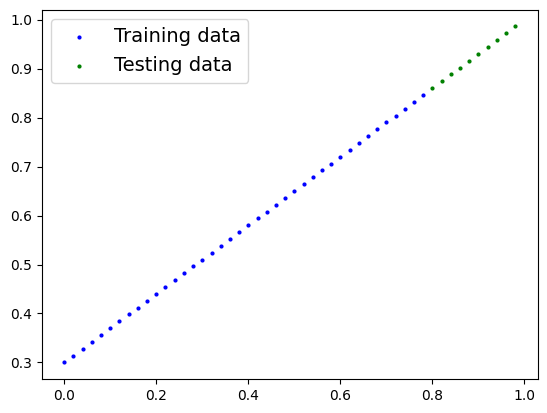

In [106]:
plot_predictions();

##2. Build model

Our first Pytorch model


In [107]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


In [108]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])


### Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [109]:
# Create a random seed
#torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [110]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as random float tensors?

This is because we initialized them above using `torch.randn()`.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

> **Exercise:** Try changing the `torch.manual_seed()` value two cells above, see what happens to the weights and bias values.

Because our model starts with random values, right now it'll have poor predictive power.



Hmm?

You probably noticed we used [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) as a [context manager](https://realpython.com/python-with-statement/) (that's what the `with torch.inference_mode():` is) to make the predictions.

As the name suggests, `torch.inference_mode()` is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster.

> **Note:** In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things,
`torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

We've made some predictions, let's see what they look like.

In [111]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [112]:
# Make prediction with model
with torch.inference_mode():
  y_preds= model_0(X_test)

# you can do something with torch.no_grad(),however, torch.inference_model() is prefered
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3375],
        [0.3401],
        [0.3427],
        [0.3452],
        [0.3478],
        [0.3504],
        [0.3530],
        [0.3555],
        [0.3581],
        [0.3607]])

In [113]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

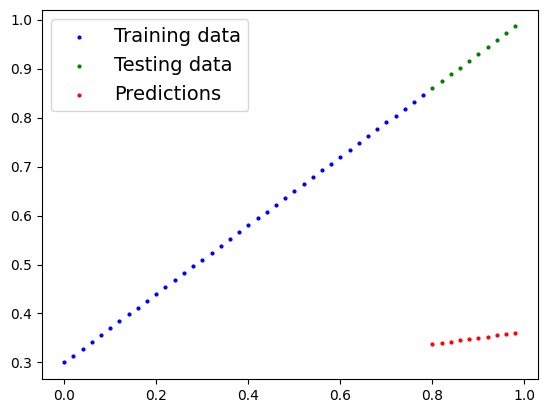

In [114]:
plot_predictions(predictions=y_preds)

##3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters(these may be random) to some *known* parameters

or in other  words from  a poor or how wrog models prdictions are is to use a loss funstion .

* Note: Loss fuction may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Thimgs we need to train:

**Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs,lower is better.

**Optimizer:** Takes into account the loss of a model and adjustss the model's parameters(weights and bias) to improve the loss function.

And specifically for Pytorch,we need:
* A training loop
* A testing loop

read torch.optimizer

In [115]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [116]:
#Check out models parameter is a value that the model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [117]:
## Setuo a loss function
loss_fn =nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) # lr= learning rate

### Pytorch training loop

A couple of things we need in a training loop:

0. Loopp through the data
1. Forward pass  (this involves data moving through our models forward() function) to make pred on data - aslso called forward propagation
2. Calculate the loss(compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradiets of each of the parameters of our model with respect to the loss
5. Optimizer step- use the optimizer to adjust our models parameters to try and imporive loss

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

In [118]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 30000


# Create empty loss lists to track values
epoch_count = []
loss_values = []
test_loss_values = []
epoch_count = []

  ### Training
  #0. Loop through the data
for epoch in range(epochs):


    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            #Print out model state_dict()
            print(model_0.state_dict())

Streaming output truncated to the last 5000 lines.
Epoch: 5000 | MAE Train Loss: 0.08303127437829971 | MAE Test Loss: 0.2118622064590454 
OrderedDict({'weights': tensor([0.2849]), 'bias': tensor([0.4576])})
Epoch: 5010 | MAE Train Loss: 0.08298079669475555 | MAE Test Loss: 0.21161720156669617 
OrderedDict({'weights': tensor([0.2851]), 'bias': tensor([0.4576])})
Epoch: 5020 | MAE Train Loss: 0.08293694257736206 | MAE Test Loss: 0.21141910552978516 
OrderedDict({'weights': tensor([0.2853]), 'bias': tensor([0.4576])})
Epoch: 5030 | MAE Train Loss: 0.08289696276187897 | MAE Test Loss: 0.21124112606048584 
OrderedDict({'weights': tensor([0.2855]), 'bias': tensor([0.4576])})
Epoch: 5040 | MAE Train Loss: 0.08285696059465408 | MAE Test Loss: 0.21106314659118652 
OrderedDict({'weights': tensor([0.2857]), 'bias': tensor([0.4576])})
Epoch: 5050 | MAE Train Loss: 0.0828169584274292 | MAE Test Loss: 0.2108851671218872 
OrderedDict({'weights': tensor([0.2859]), 'bias': tensor([0.4576])})
Epoch: 506

In [119]:
# import numpy as np
# np.array(torch.tensor(loss_values).numpy()), test_loss_values

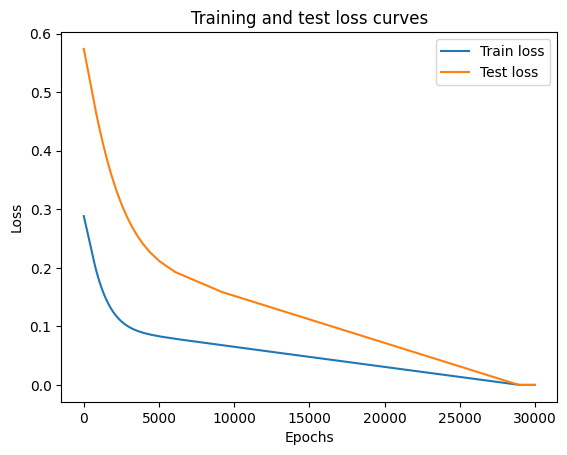

In [120]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [121]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds

tensor([[0.3375],
        [0.3401],
        [0.3427],
        [0.3452],
        [0.3478],
        [0.3504],
        [0.3530],
        [0.3555],
        [0.3581],
        [0.3607]])

In [122]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [123]:
weight,bias

(0.7, 0.3)

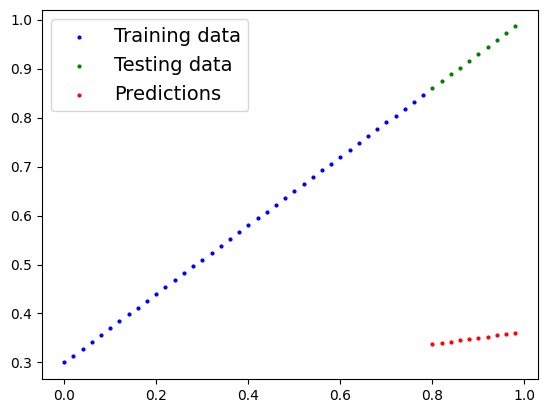

In [124]:
plot_predictions(predictions=y_preds)

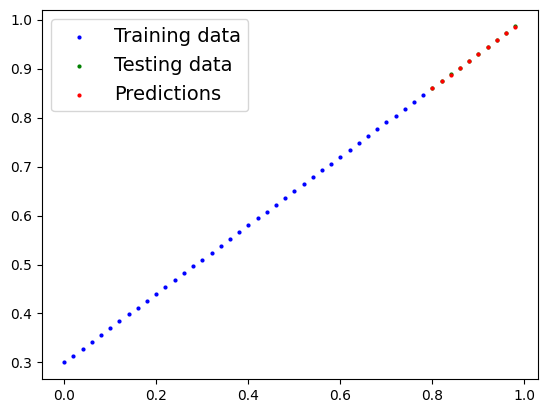

In [125]:
plot_predictions(predictions=y_preds_new)

### Saving a model in Pytorch

There are three main method you should for saving and loading models in Pytorch.

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format

2. `torch.load()` - allows you load a saved Pytorch object

3. `torch.nn.module.load_state_dict()` - this allows to load a model's saved state dictionary

In [126]:
# saving our Pytorch model
from pathlib import Path

# Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2 Create model save
MODEL_NAME  = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3.save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [127]:
! ls -l models

total 4
-rw-r--r-- 1 root root 2117 Aug 27 19:28 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our models `state_dict()` rather the entire model we'll create a new instance of our model and load the saved `state_dict()` into that


In [128]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [129]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [130]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [131]:
#Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8599],
        [0.8739],
        [0.8879],
        [0.9019],
        [0.9159],
        [0.9299],
        [0.9439],
        [0.9579],
        [0.9719],
        [0.9859]])

In [132]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


  y_preds

In [133]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

learn saving and loading model

## 6.Putting it all together

Lets go back through the steps above and see it all in one place

In [134]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.8.0+cu126'

Create device_agnostic code.

This means if we've got acesss to a GPU , our code (for potentially faster computing).

If no GPU is available ,the code will default to using CPU

In [135]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [136]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 6.1 Data

In [137]:
 # Create some data using the linear regression formula of y = weight * X + bias
 weight = 0.7
 bias =0.3

 # Create range values
 start =0
 end = 1
 step =0.02

 # Create X and y (features  and labels)

X = torch.arange(start,end,step).unsqueeze(dim=1)#without unsqueeze, error will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [138]:
#Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

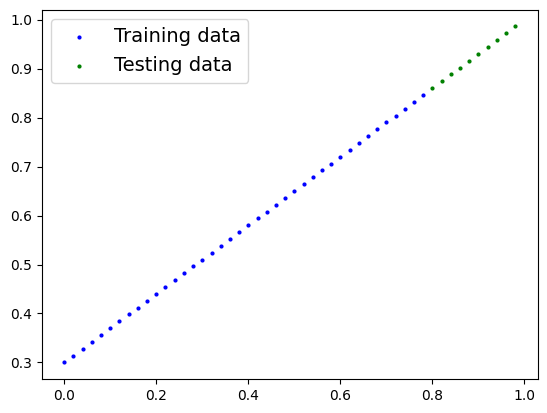

In [139]:
#Plot the data
# Note: if you dont have the plot_prediction() function loaded,this will error
plot_predictions(X_train,y_train,X_test,y_test)

#6.2 Building a Pytorch linear model

In [140]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating thre model parameters / also called : linear transform
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # Correctly define the forward method outside of __init__
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [141]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [142]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [143]:
# Setthe model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [144]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For trainig we needd:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [145]:
#Setup loss function
loss_fn = nn.L1Loss() # same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [146]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [147]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [148]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [149]:
#Turn model into evaluation mode
model_1.eval()

#Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

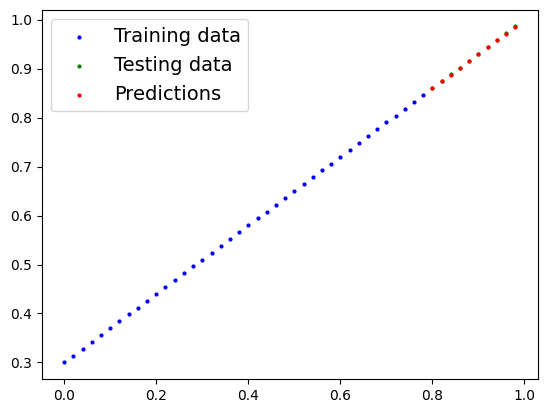

In [152]:
# Check our model prediction visually

plot_predictions(predictions=y_preds.cpu())